# Histograms

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Recall that Matplotlib expects the images in an RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original BGR ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

In [2]:
bgr_bricks = cv2.imread("DATA/bricks.jpg")
rgb_bricks = cv2.cvtColor(bgr_bricks, cv2.COLOR_BGR2RGB)

bgr_rainbow = cv2.imread("DATA/rainbow.jpg")
rgb_rainbow = cv2.cvtColor(bgr_rainbow, cv2.COLOR_BGR2RGB)

bgr_horse = cv2.imread("DATA/horse.jpg")
rgb_horse = cv2.cvtColor(bgr_horse, cv2.COLOR_BGR2RGB)

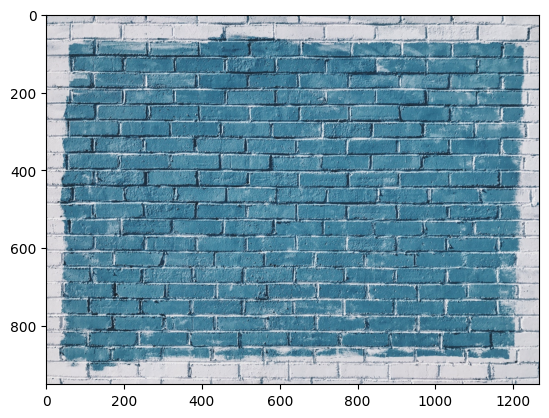

In [3]:
plt.imshow(rgb_bricks)

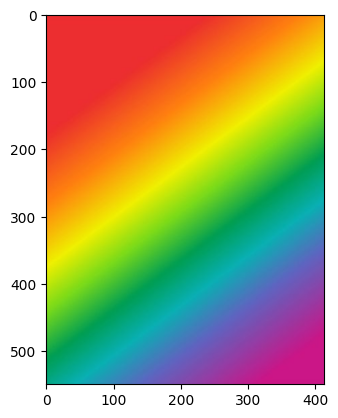

In [4]:
plt.imshow(rgb_rainbow)

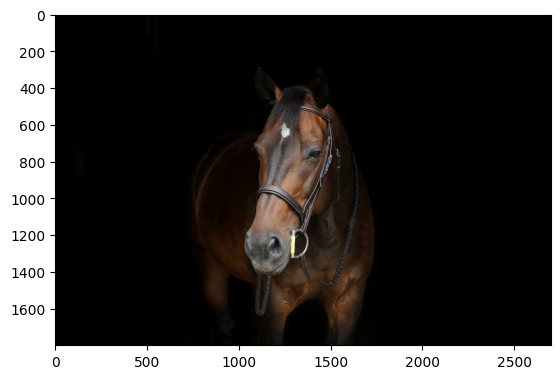

In [5]:
plt.imshow(rgb_horse)

## OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images: it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels: it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask: mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.
* histSize: this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges: this is our RANGE. Normally, it is [0,256].

### Plotting only one color histograms

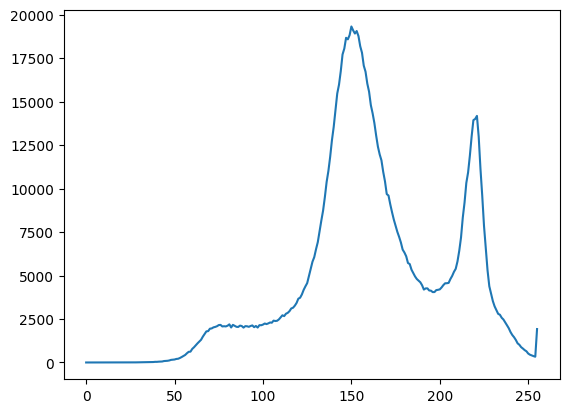

In [6]:
hist_values = cv2.calcHist([bgr_bricks], channels=[0], mask=None, histSize=[256], ranges=[0, 256]) # Only blue channel
plt.plot(hist_values)

### Plotting three color histograms

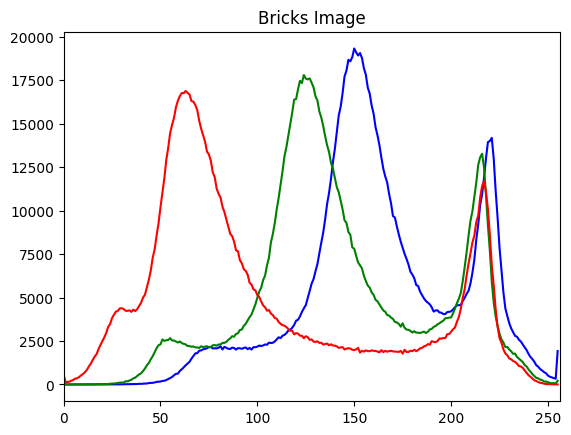

In [7]:
img = bgr_bricks
color = ("b", "g", "r")

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title("Bricks Image")
plt.show()

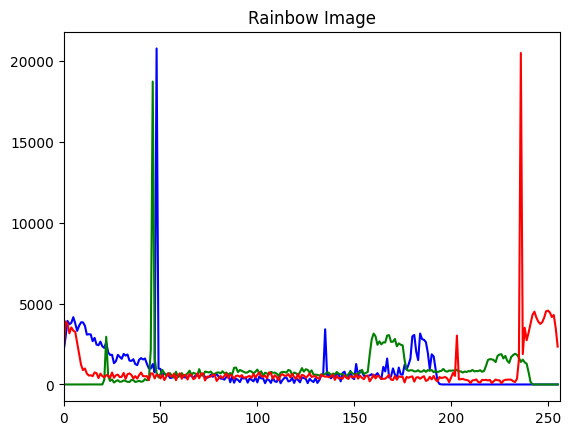

In [8]:
img = bgr_rainbow
color = ("b", "g", "r")

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title("Rainbow Image")
plt.show()

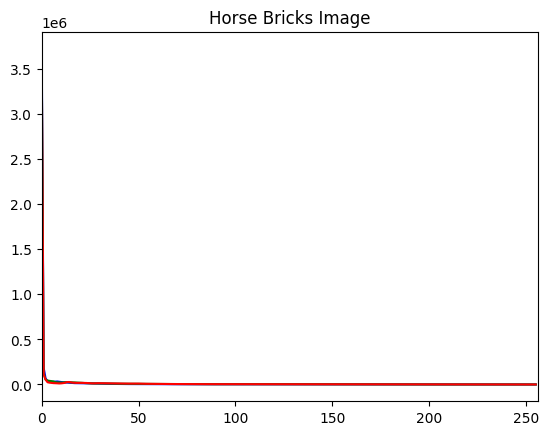

In [9]:
img = bgr_horse
color = ("b", "g", "r")

for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
    
plt.title("Horse Bricks Image")
plt.show()

### Masking

We can mask only certain parts of the image.

In [10]:
mask = np.zeros(bgr_rainbow.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

bgr_masked_img = cv2.bitwise_and(bgr_rainbow, bgr_rainbow, mask=mask)
rgb_masked_img = cv2.bitwise_and(rgb_rainbow, rgb_rainbow, mask=mask)

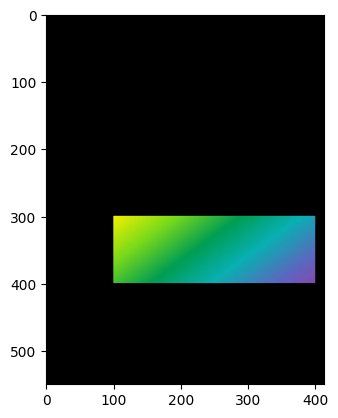

In [11]:
plt.imshow(rgb_masked_img)

In [12]:
hist_mask_values_red = cv2.calcHist([bgr_rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0, 256])
hist_full_values_red = cv2.calcHist([bgr_rainbow], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

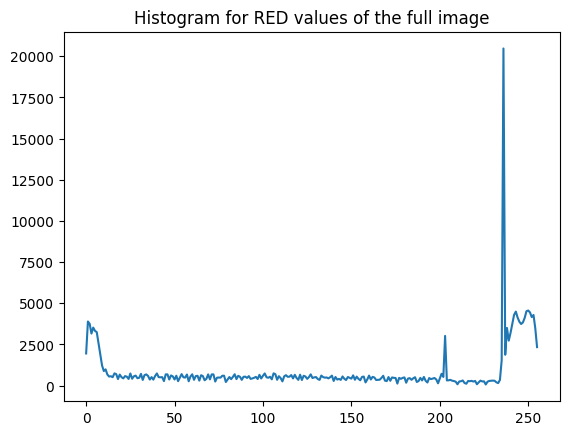

In [13]:
plt.plot(hist_full_values_red)
plt.title("Histogram for RED values of the full image")

Text(0.5, 1.0, 'Histogram for RED values for the masked area')

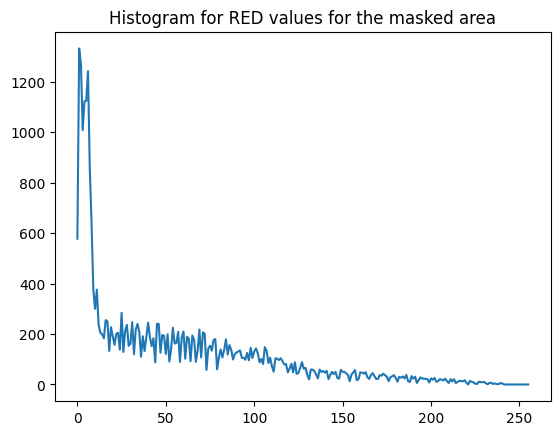

In [14]:
plt.plot(hist_mask_values_red)
plt.title("Histogram for RED values for the masked area")

## Histogram Equalization

### Single channel (grayscale)

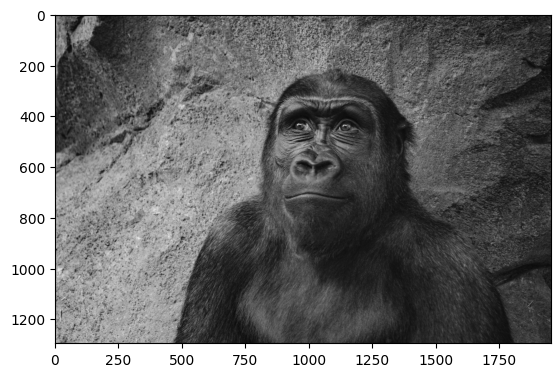

In [15]:
gray_gorilla = cv2.imread("DATA/gorilla.jpg", 0)
plt.imshow(gray_gorilla, cmap="gray")

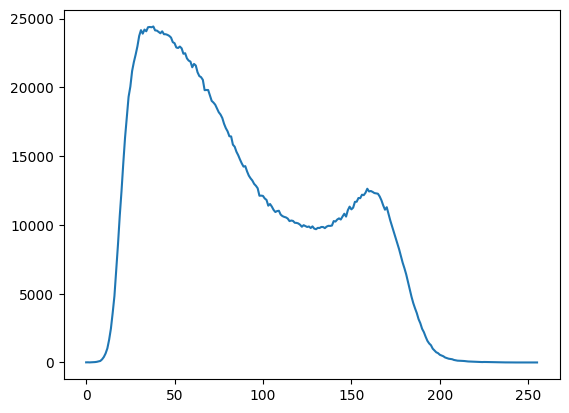

In [16]:
hist_values = cv2.calcHist([gray_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(hist_values)

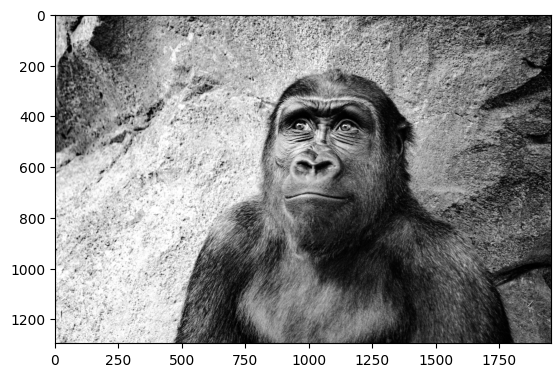

In [17]:
eq_gray_gorilla = cv2.equalizeHist(gray_gorilla)
plt.imshow(eq_gray_gorilla, cmap="gray")

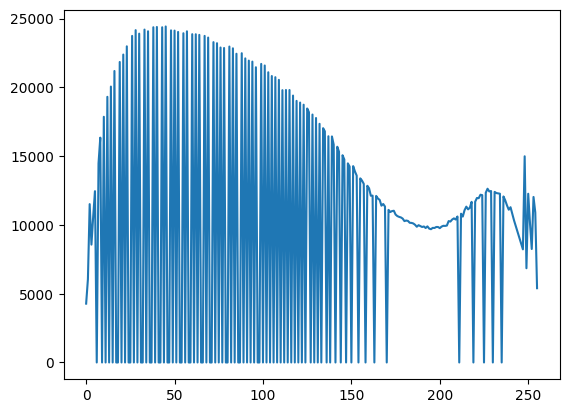

In [18]:
eq_hist_values = cv2.calcHist([eq_gray_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.plot(eq_hist_values)

### Color Image

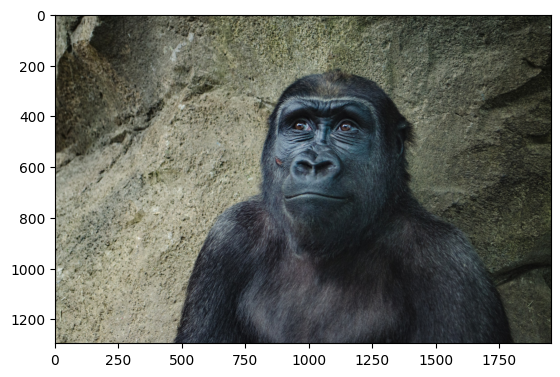

In [19]:
color_gorilla = cv2.imread("DATA/gorilla.jpg")
rgb_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
hsv_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
plt.imshow(rgb_color_gorilla)

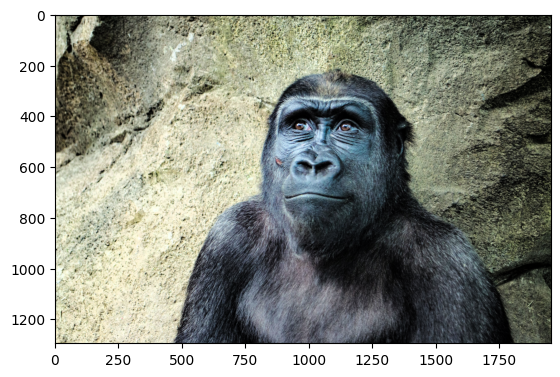

In [20]:
hsv_color_gorilla[:,:,2] = cv2.equalizeHist(hsv_color_gorilla[:,:,2])
rgb_color_gorilla = cv2.cvtColor(hsv_color_gorilla, cv2.COLOR_HSV2RGB)
plt.imshow(rgb_color_gorilla)